In [1]:
from random import choice as r_choice
import seaborn as sns

In [3]:
with open("validated_variants.csv", 'r', encoding='utf-8') as handler:
    dic_info: dict[str,list[int]] = {}
    for line in handler.readlines():
        name,_, pos, *remaining = line.split(',')
        if dic_info.get(name,False):
            dic_info[name].append(int(pos))
        else:
            dic_info[name] = [int(pos)]


<AxesSubplot: >

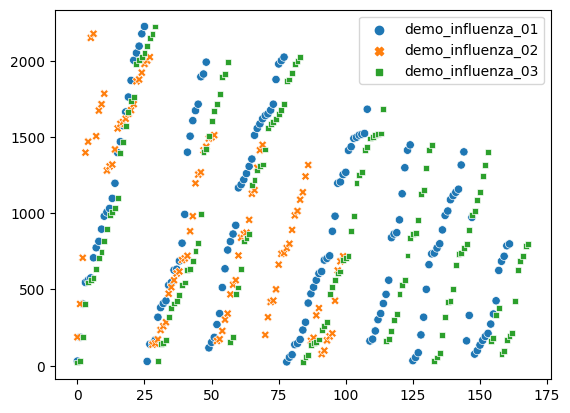

In [4]:
sns.scatterplot(dic_info, legend=True)

In [10]:
more_40 = {}
less_40 = {}
for k,v in dic_info.items():
    if len(v) >= 45:
        more_40[k] = v
    else:
        less_40[k] = v

In [13]:
import pandas as pd
lens = []
for i in more_40.values():
    lens.append(len(i))

df = pd.DataFrame(lens)
# stats = df.describe()
# round(stats)

<AxesSubplot: >

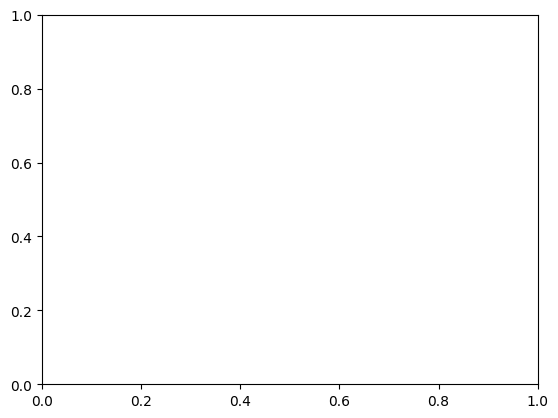

In [14]:
sns.scatterplot(more_40, legend=False)

<AxesSubplot: ylabel='Count'>

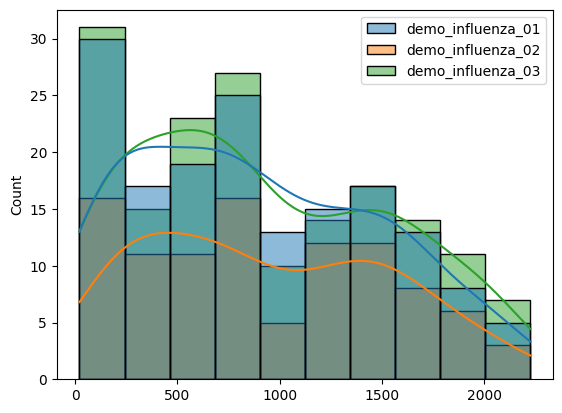

In [5]:
sns.histplot(dic_info, legend=True,kde=True, bins=10)

<AxesSubplot: >

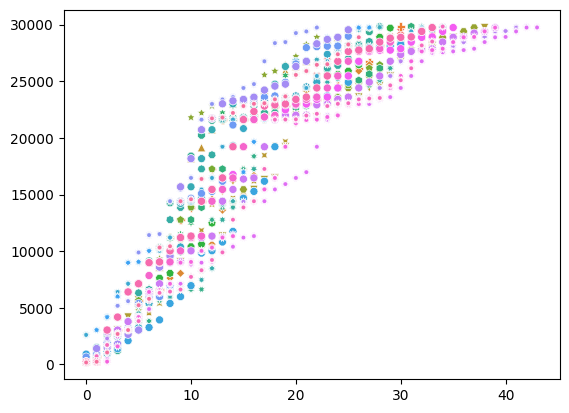

In [249]:
sns.scatterplot(less_40, legend=False)

In [273]:
import pandas as pd
lens = []
for i in less_40.values():
    lens.append(len(i))

df = pd.DataFrame(lens)
stats = df.describe()
round(stats)

,0
count,40.0
mean,32.0
std,5.0
min,23.0
25%,28.0
50%,32.0
75%,34.0
max,44.0


<AxesSubplot: ylabel='Count'>

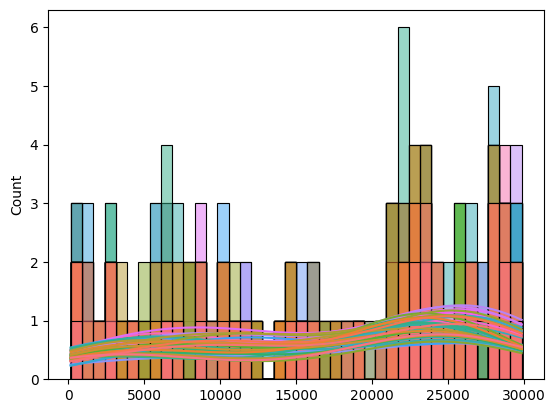

In [283]:
# less_40['dist'] = sorted(dist)
sns.histplot(less_40, legend=False,kde=True, bins=40)

In [284]:
from fitter import Fitter, get_common_distributions, get_distributions

In [285]:
all_values = []
for i in map(lambda x: less_40[x], less_40):
    all_values.extend(i)

Fitting 5 distributions: 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.466040e-07,2092.468880,-28936.427437,inf,0.111017,4.799039e-14
burr,1.587350e-07,2071.188264,-28835.779083,inf,0.211293,4.528525e-50
norm,1.846142e-07,2106.097197,-28658.859734,inf,0.191597,3.543318e-41
gamma,1.857580e-07,2107.839242,-28643.896609,inf,0.196346,3.071485e-43
lognorm,2.427615e-07,2603.129162,-28305.070771,inf,0.722493,0.000000e+00


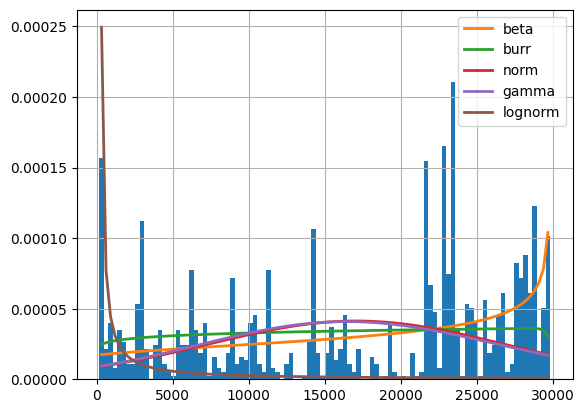

In [286]:
f = Fitter(all_values,distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [287]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.1914762124546325,
  'b': 0.7414106684026398,
  'loc': -3490.6398630079593,
  'scale': 33328.639863007964}}

In [288]:
f.fitted_param["beta"]

(1.1914762124546325,
 0.7414106684026398,
 -3490.6398630079593,
 33328.639863007964)

<AxesSubplot: ylabel='Count'>

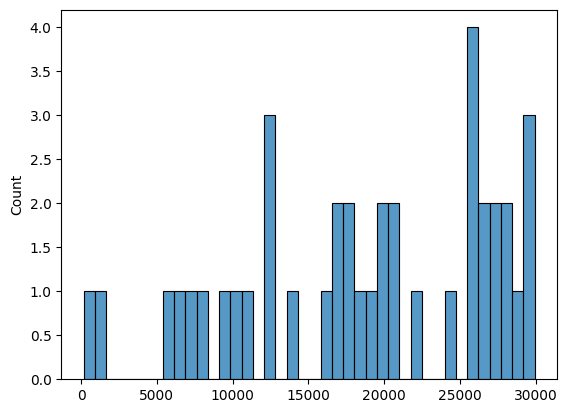

In [312]:
from numpy.random import beta

dist = beta(1.1914762124546325,
 0.7414106684026398,40)* 30000
sns.histplot(dist, bins=40)

In [313]:
all_values = []
for i in map(lambda x: more_40[x], more_40):
    all_values.extend(i)

Fitting 5 distributions: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,3.510120e-07,2134.229680,-17494.900859,inf,0.258987,1.582262e-48
lognorm,3.698464e-07,2126.460967,-17445.760402,inf,0.312790,4.357321e-71
burr,4.274435e-07,2166.654229,-17321.536590,inf,0.300878,1.072576e-65
beta,4.432851e-07,2143.856176,-17291.987071,inf,0.274865,1.038529e-54
gamma,4.732084e-07,inf,-17245.644428,inf,0.965517,0.000000e+00


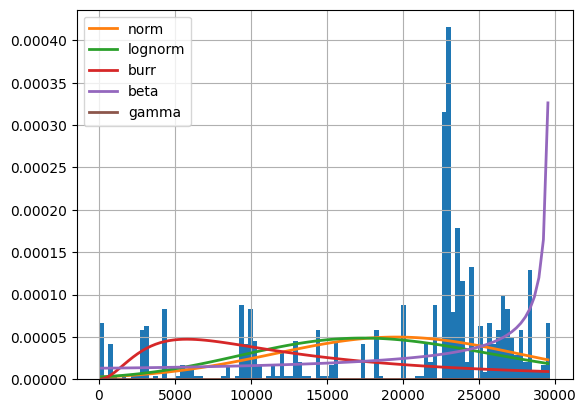

In [314]:
f = Fitter(all_values,distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [315]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 19554.16133004926, 'scale': 8007.259573916106}}

In [329]:
f.fitted_param["beta"]

(0.9658685763849897, 0.3777279400819377, -3059.52400272875, 32725.524002728755)

57


<AxesSubplot: ylabel='Count'>

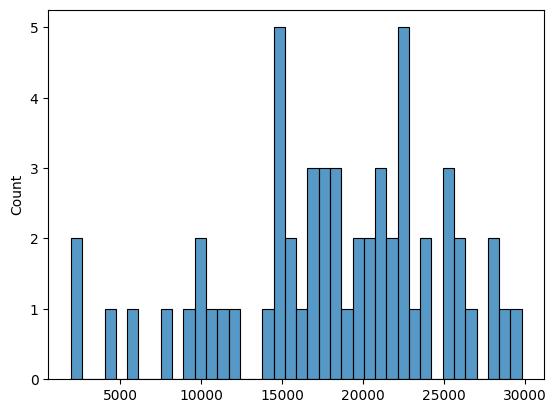

In [423]:
from numpy.random import normal

dist = normal(19554.16133004926,8007.259573916106,65)
dist = [x for x in dist if x < 30000]
print(len(dist))
sns.histplot(dist, bins=40)